In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
df.shape

(400, 9)

In [56]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.0


In [21]:
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold = 0.75)
df['Chance of admit '] = bi.fit_transform(df[['Chance of Admit ']])

In [22]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.0


In [57]:
x = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

In [58]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1.0
396,397,325,107,3,3.0,3.5,9.11,1,1.0
397,398,330,116,4,5.0,4.5,9.45,1,1.0
398,399,312,103,3,3.5,4.0,8.78,0,0.0


In [59]:
y = y.astype('int')

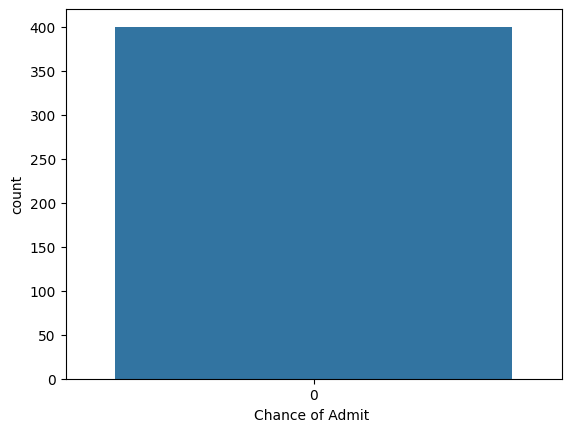

In [60]:
sns.countplot(x = y);

In [27]:
y.value_counts()

Chance of Admit 
0    400
Name: count, dtype: int64

In [61]:
x_train.shape

(300, 9)

In [62]:
x_test.shape

(100, 9)

In [63]:
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of admit
132,133,309,105,5,3.5,3.5,8.56,0,0.0
309,310,308,110,4,3.5,3.0,8.60,0,0.0
341,342,326,110,3,3.5,3.5,8.76,1,1.0
196,197,306,105,2,3.0,2.5,8.26,0,0.0
246,247,316,105,3,3.0,3.5,8.73,0,0.0
...,...,...,...,...,...,...,...,...,...
146,147,315,105,3,2.0,2.5,8.48,0,0.0
135,136,314,109,4,3.5,4.0,8.77,1,1.0
390,391,314,102,2,2.0,2.5,8.24,0,0.0
264,265,325,110,2,3.0,2.5,8.76,1,0.0


In [38]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
classifier = DecisionTreeClassifier(random_state=0)

In [65]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [43]:
y_pred = classifier.predict(x_test)

In [66]:
result = pd.DataFrame({
    'actual' : y_test,
    'predicted' : y_pred
})
    

In [69]:
result

,actual,predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,0,0
135,0,0
390,0,0
264,0,0


In [67]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

C:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


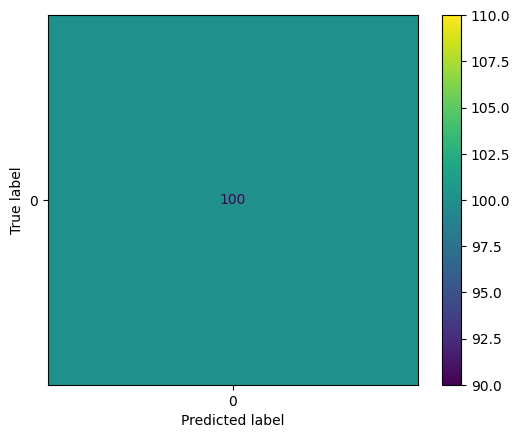

In [68]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(y_test, y_pred)

In [70]:
accuracy_score(y_test, y_pred)

1.0

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [77]:
new = [[136,314,109,4,3.5,4.0,8.77,1,1]]
classifier.predict(new)[0]

C:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

In [78]:
from sklearn.tree import plot_tree

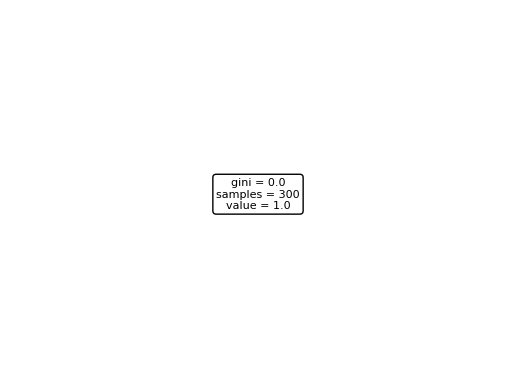

In [80]:
plot_tree(classifier, fontsize=8, filled=True, rounded=True);